Liste des points : [(500.0, 500.0), (609, 50), (478, 75), (917, 902), (159, 239), (593, 322), (786, 995), (78, 858), (716, 712), (165, 517), (891, 72), (729, 212), (947, 581), (481, 669), (462, 513), (595, 758), (286, 372), (432, 295), (401, 252), (205, 463), (420, 812)]
0
0
1
1
2
2
3
4
4
5
5
6
7
8
8
8
9
9
10
11
14
15
15
16
20
Matrice d'adjacence 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

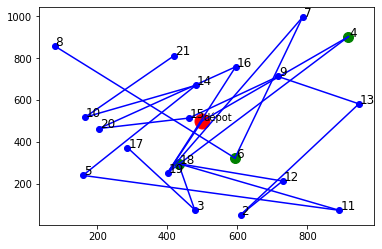

In [56]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i+1, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    for i in range(len(matrix)):
        if i < len(matrix):
            while(sum(matrix[i])<linksLimit):
                print(i)
                nbchoisi = np.random.randint(i,len(matrix))
                matrix[i][nbchoisi] = 1
                matrix[nbchoisi][i] = 1
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = poids
                matrix[j][i]
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 20
pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)

plotPoints(pointList)
randomPackages(3, nbPoints)
matrix = makematrix(pointList, 2)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)
